In [4]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns',None)
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

## Data preprocessing

In [7]:
# Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Handling 'TotalCharges' column
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [10]:
# We can see from the value_counts that there is an empty string
# Finding the mean leaving out the missing string
TotalCharges_mean = df[df['TotalCharges']!=' ']['TotalCharges'].astype('float').mean()
TotalCharges_mean = round(TotalCharges_mean, 2)
# Replacing the missing string with mean
df['TotalCharges']=df['TotalCharges'].replace(' ', TotalCharges_mean)

In [11]:
# Converting the "TotalCharges" to float type
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [12]:
# Dropping unnecessary column
df.drop('customerID', axis=1, inplace= True)

In [13]:
# Making 'SeniorCitizen' column object type for visiualization
df['SeniorCitizen']= df['SeniorCitizen'].astype('object')

In [14]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()

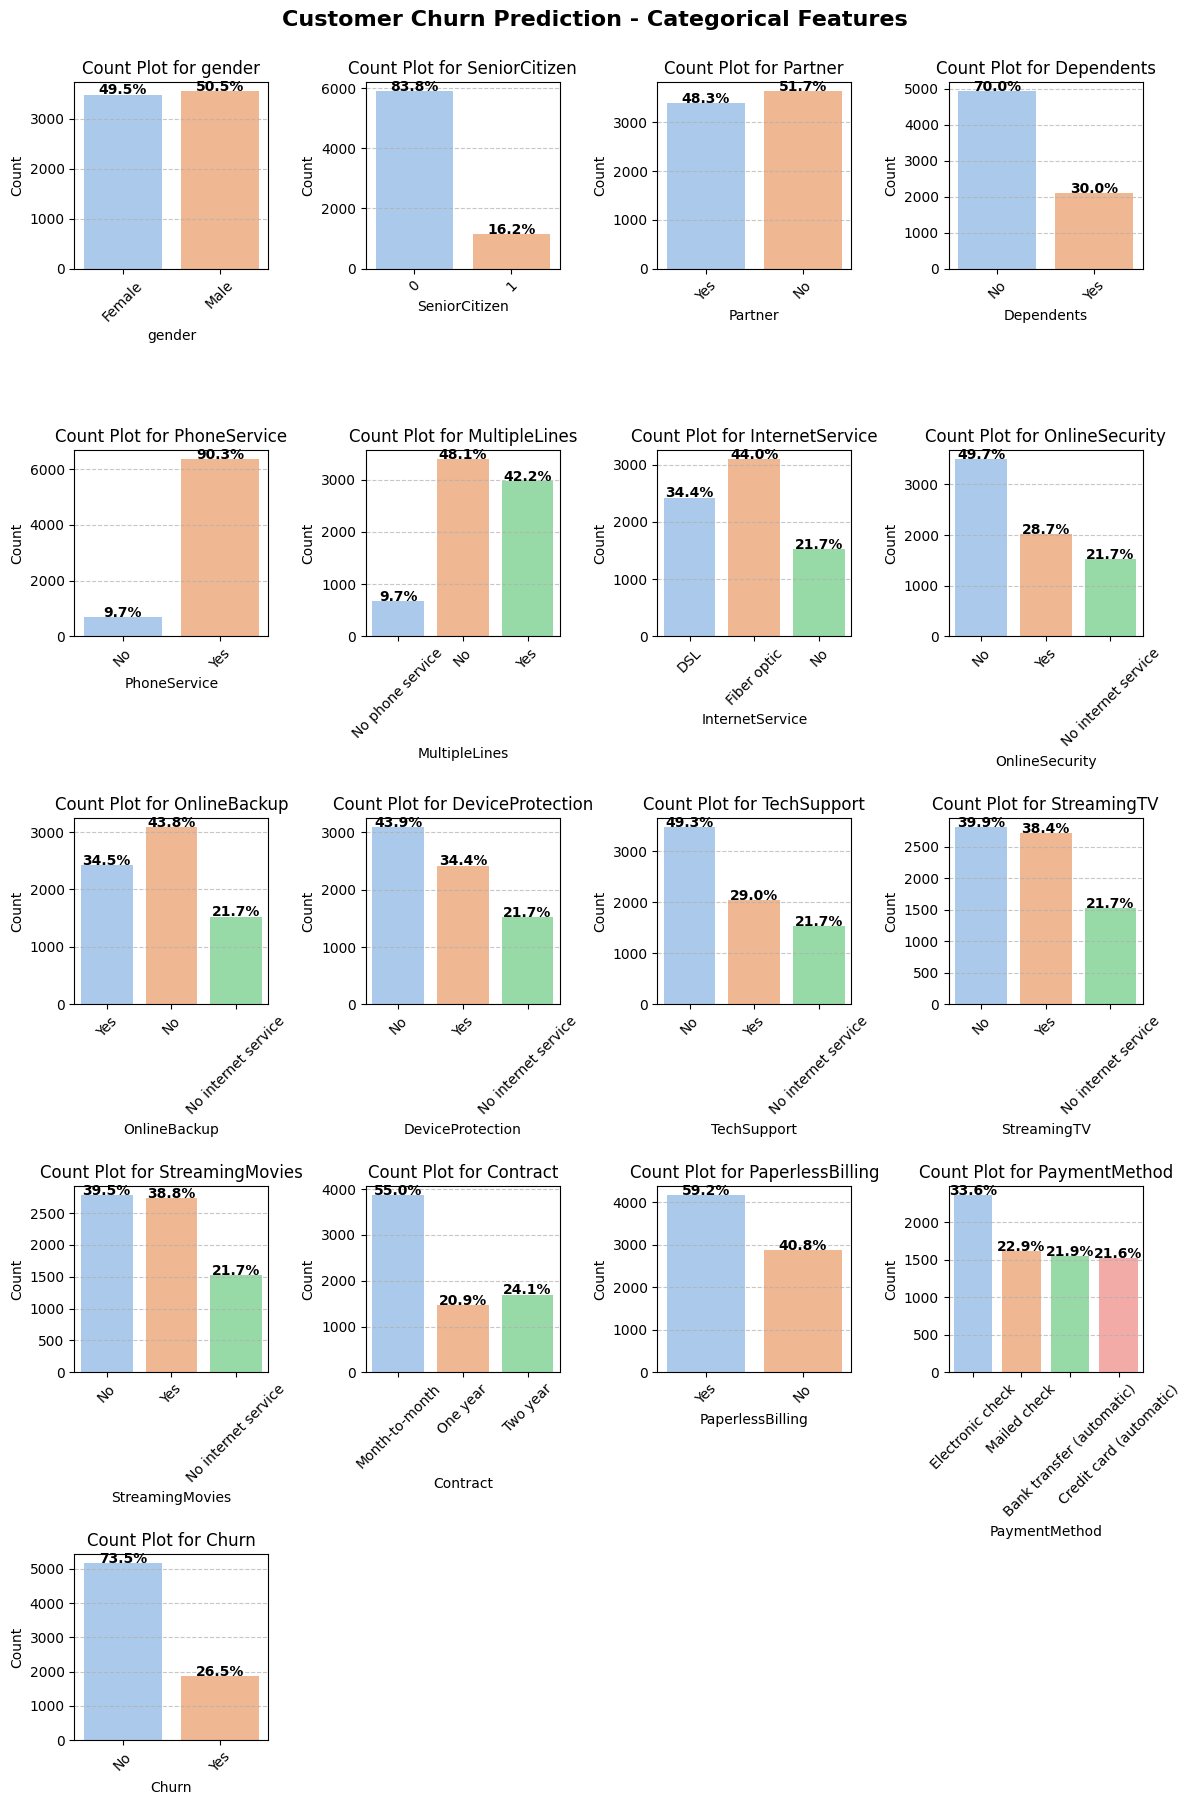

In [15]:
# Visualising countplots for all object type columns

# Setting the number of rows and columns for subplots
num_rows = 5
num_cols = (len(categorical_columns) + num_rows - 1) // num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))

# Flatten axes if necessary
axes = axes.flatten()

# Custom color palette
color_palette = sns.color_palette("pastel")

# Loop through object columns and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette=color_palette)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f"Count Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
 # Adding percentage labels
    total_count = len(df[column])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 5, f'{height / total_count:.1%}',
                     ha="center", fontsize=10, fontweight='bold')

# Hiding the extra subplots if any 
for j in range(len(categorical_columns), num_rows * num_cols):
    axes[j].axis('off')

plt.suptitle("Customer Churn Prediction - Categorical Features", fontsize=16, y=1.00, fontweight='bold')
plt.tight_layout()
plt.show()

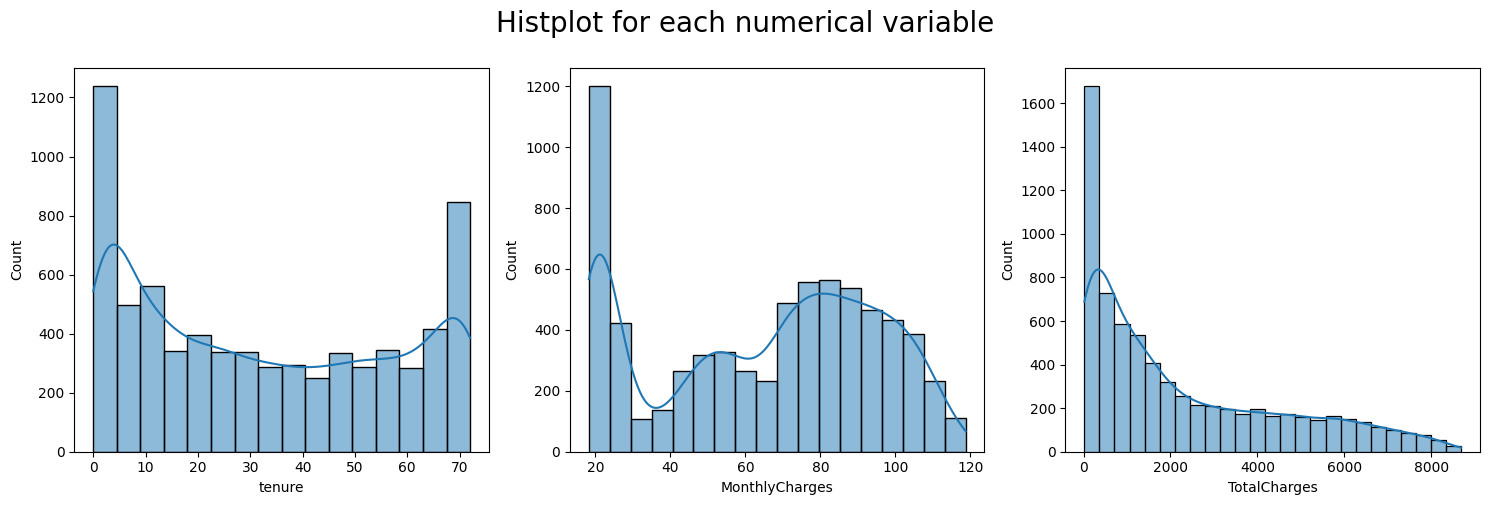

In [16]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    fig.suptitle('Histplot for each numerical variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical_columns)
plt.tight_layout()

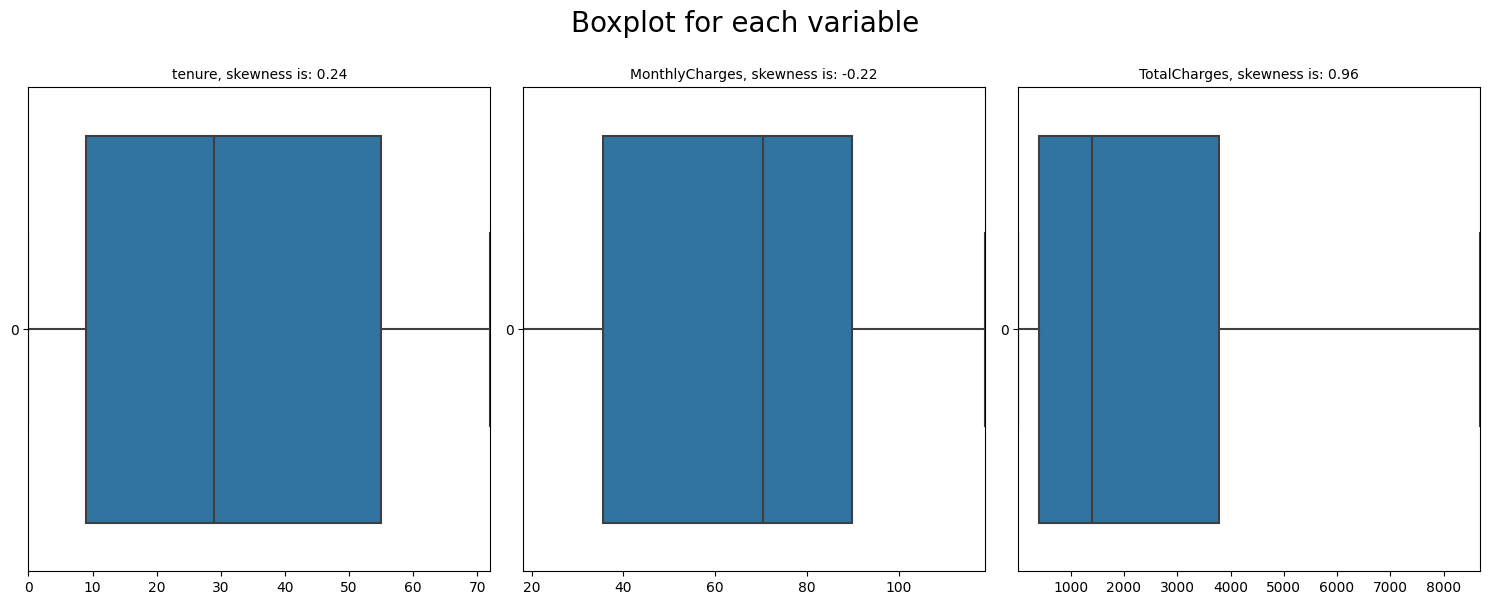

In [17]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical_columns)
plt.tight_layout()

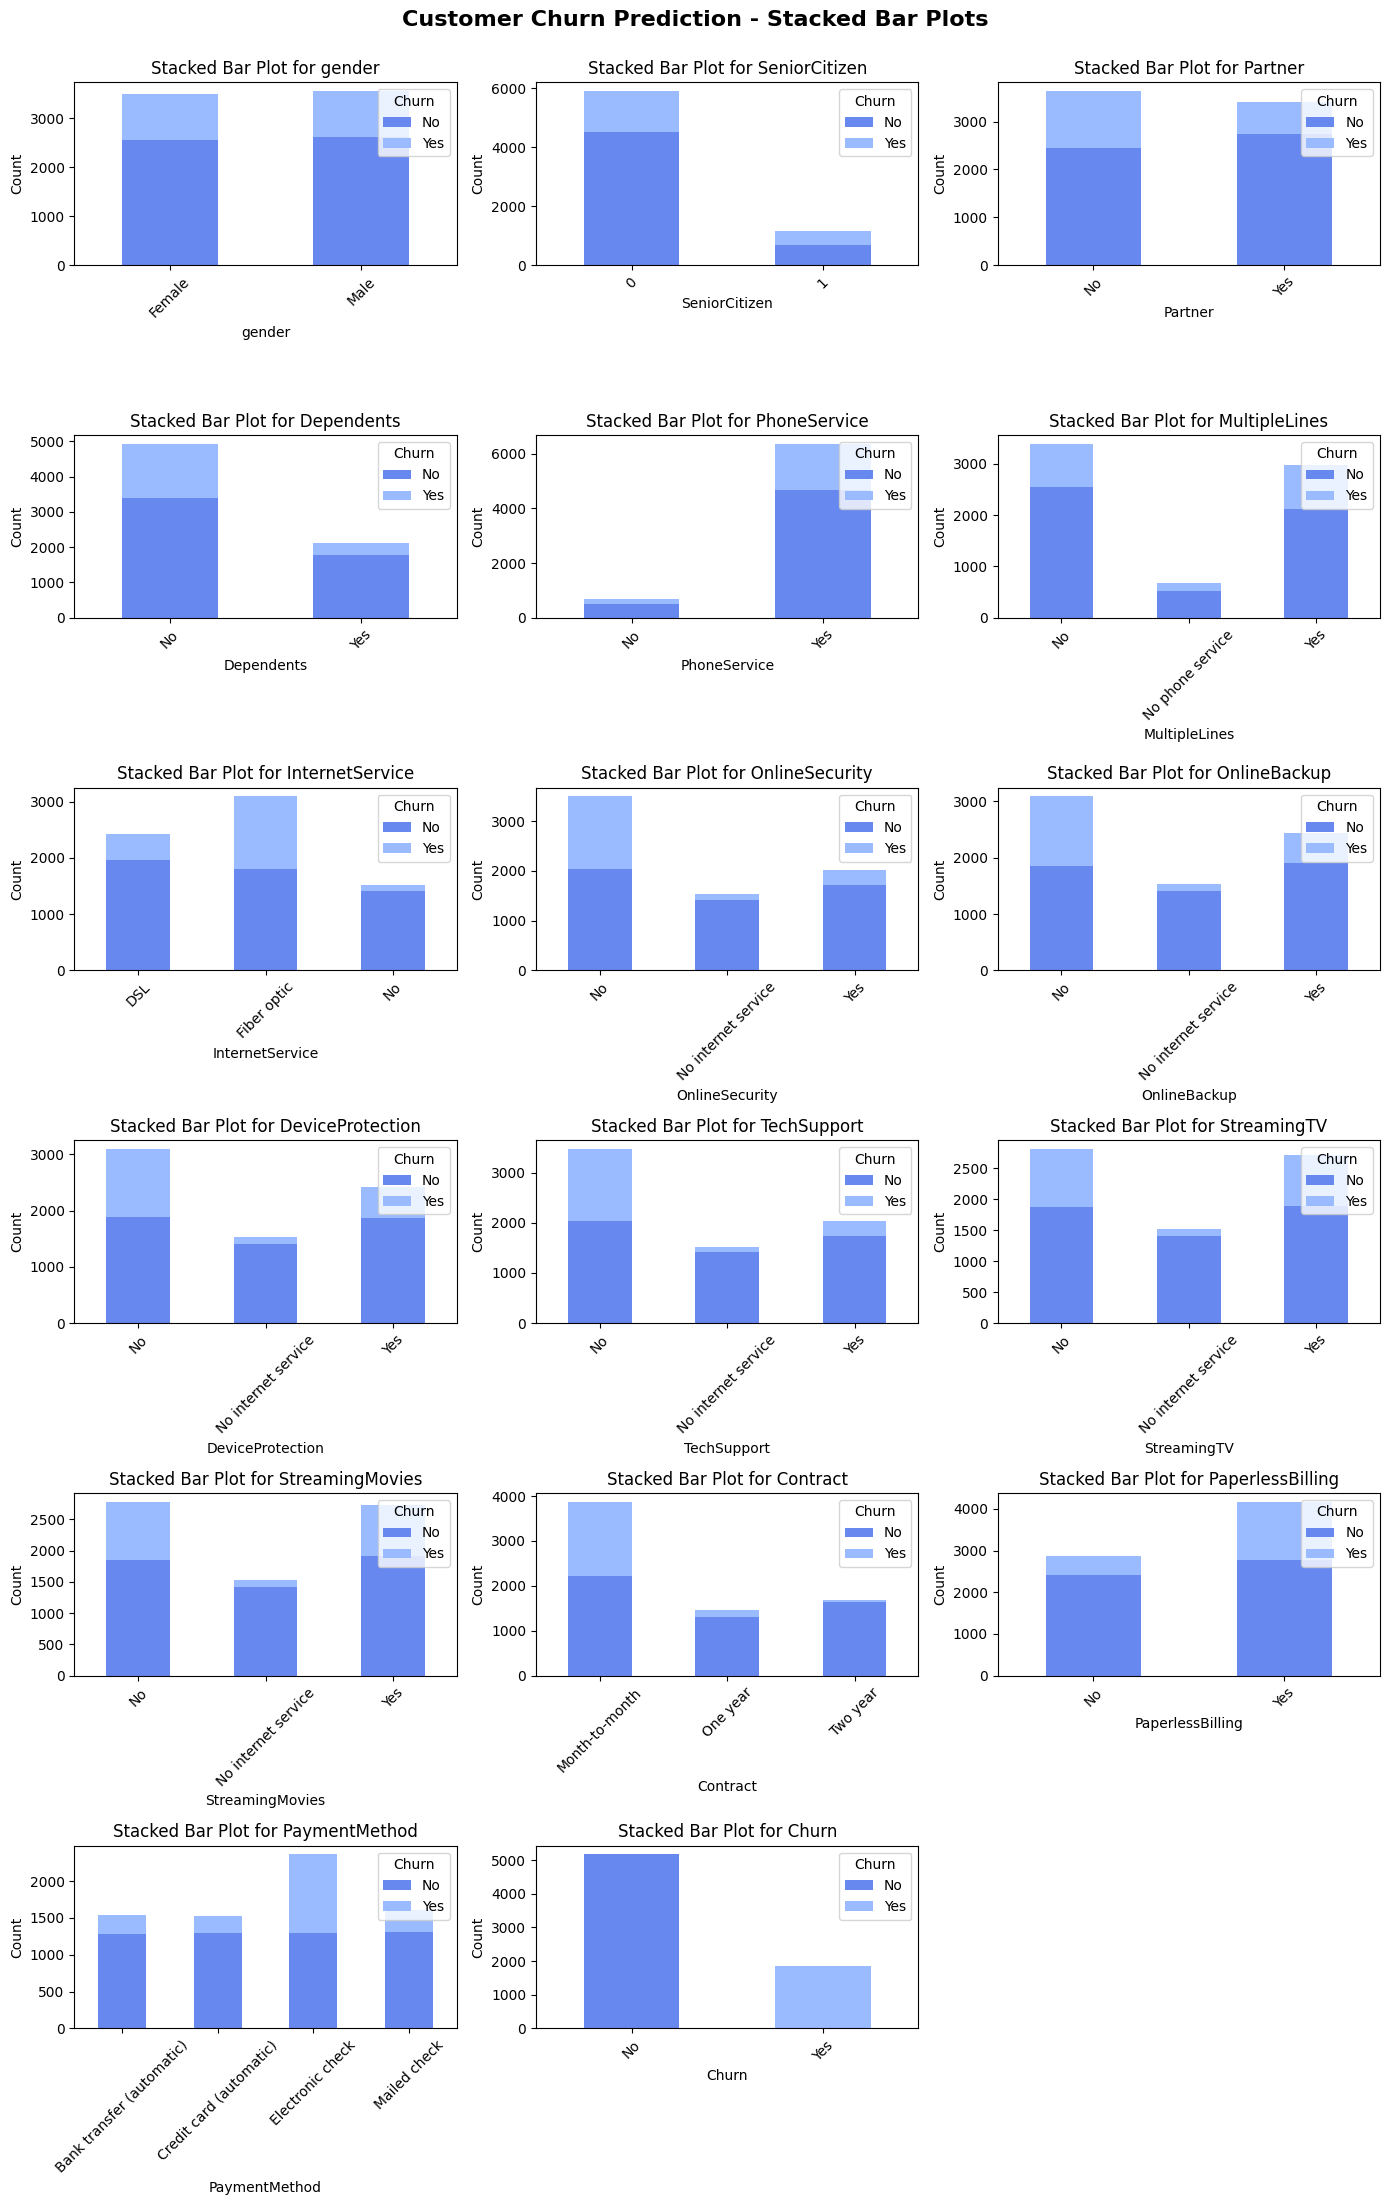

In [18]:
# Create subplots
fig, axes = plt.subplots(6, 3, figsize=(14, 22))

# Flatten axes if necessary
axes = axes.flatten()

# Custom color palette
color_palette = sns.color_palette("coolwarm")

# Loop through object columns and create stacked bar plots
for i, column in enumerate(categorical_columns):
    churn_grouped = df.groupby([column, 'Churn']).size().unstack().fillna(0)
    churn_grouped.plot(kind='bar', stacked=True, ax=axes[i], color=color_palette)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f"Stacked Bar Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Churn', loc='upper right')  # Add legend

# Hiding the extra subplots 
for j in range(len(categorical_columns), 6 * 3):
    axes[j].axis('off')
    # Add main title
plt.suptitle("Customer Churn Prediction - Stacked Bar Plots", fontsize=16, y=1.00, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

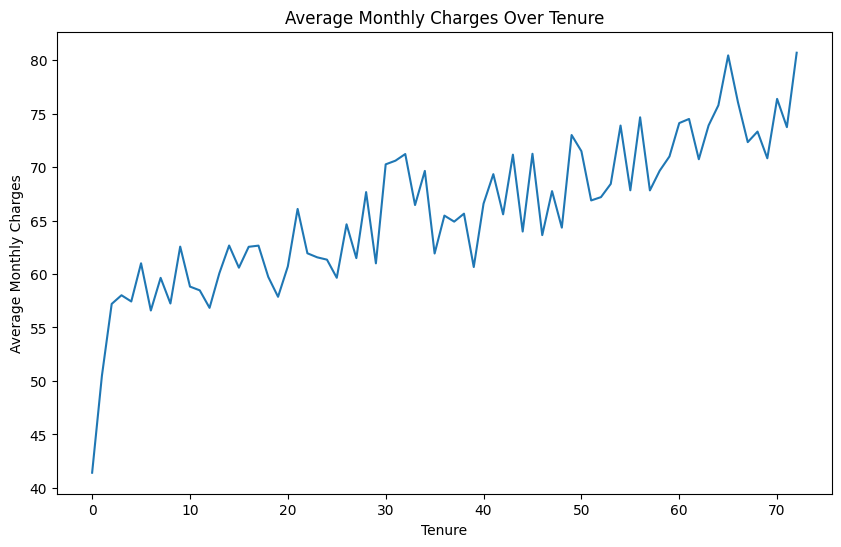

In [19]:
# A line plot for average monthly charges over different tenures
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', errorbar=None)
plt.title("Average Monthly Charges Over Tenure")
plt.xlabel("Tenure")
plt.ylabel("Average Monthly Charges")
plt.show()

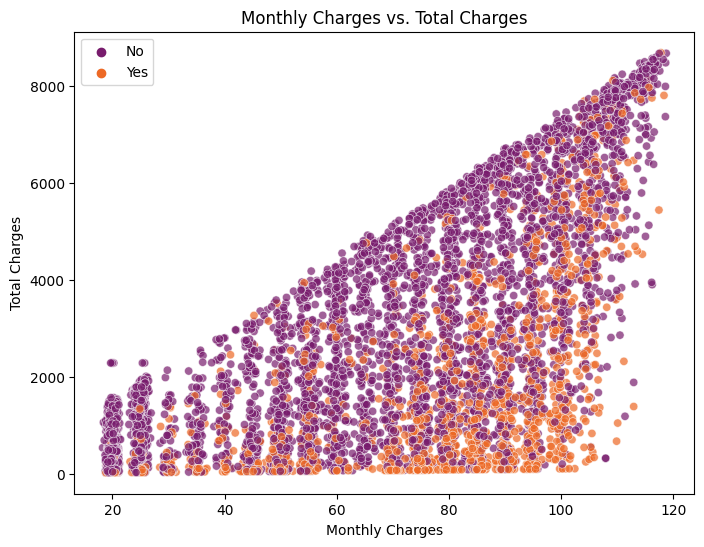

In [20]:
# Scatter plot of MonthlyCharges vs. TotalCharges with respect to Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7, palette= 'inferno')
plt.title("Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend()
plt.show()

C:\Users\WELCOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


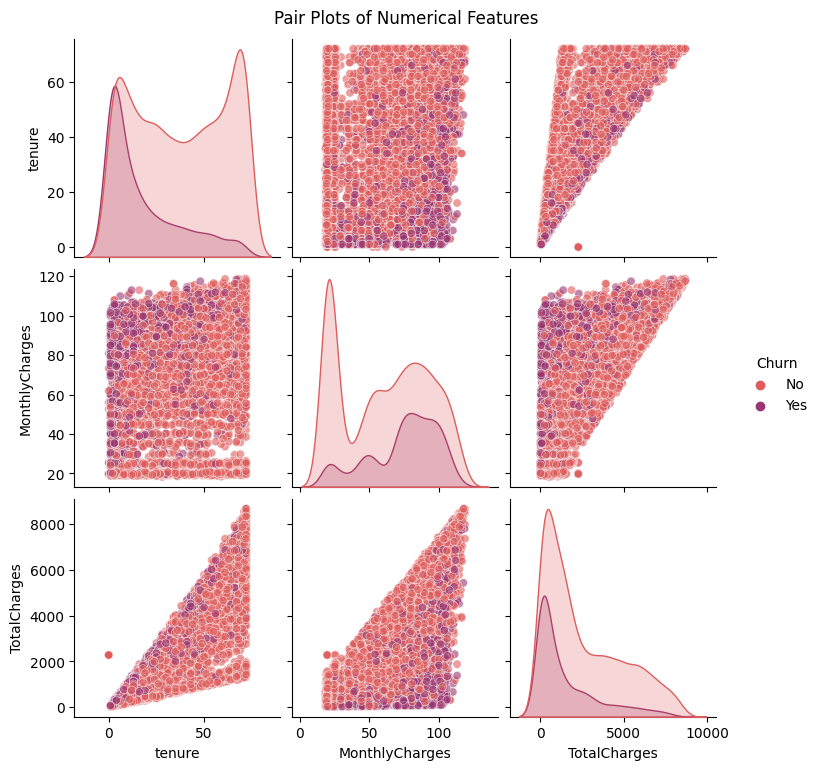

In [24]:
# pair plots for numerical features
subset_columns = ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[subset_columns], hue='Churn', diag_kind='kde', plot_kws={'alpha': 0.6}, palette= 'flare')
plt.suptitle("Pair Plots of Numerical Features", y=1.02)
plt.show()

In [26]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the column with the data
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')


In [27]:
# Plotting a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'Yes'

<Figure size 1000x700 with 0 Axes>

In [28]:
df['SeniorCitizen']= df['SeniorCitizen'].astype('int')

In [29]:
# Mapping columns that have values either "Yes" or "No"
mapping_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for i in mapping_columns:
    df[i] = df[i].map({'No': 0, 'Yes': 1})

In [30]:
# One hot encoding our categorical variable
one_hot_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(data=df,columns=one_hot_columns, drop_first= True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int32  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [32]:
## model training

In [33]:
# Dividing our dataset into independent and dependent features
X=df.drop('Churn',axis=1)
y=df['Churn']

In [34]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [35]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
!pip install collections
!pip install imblearn

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 991.0 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/235.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.6 MB/s eta 0:00:00


In [37]:
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek 

In [38]:
#UnderSampling

In [39]:
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3902, 1: 1380})
The number of classes after fit Counter({0: 1380, 1: 1380})


In [40]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [41]:
# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred=model1.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[515 757]
 [113 376]]


Accuracy Score: 
 0.5059625212947189


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.40      0.54      1272
           1       0.33      0.77      0.46       489

    accuracy                           0.51      1761
   macro avg       0.58      0.59      0.50      1761
weighted avg       0.68      0.51      0.52      1761



In [42]:
#oversampling

In [43]:
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 3902, 1: 1380})
The number of classes after fit Counter({0: 3902, 1: 3902})


In [44]:
model2=RandomForestClassifier()
model2.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [45]:
y_pred=model2.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[1079  193]
 [ 211  278]]


Accuracy Score: 
 0.7705848949460534


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1272
           1       0.59      0.57      0.58       489

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761



In [46]:
#SMOTETomek

In [47]:
st=SMOTETomek()
X_train_st,y_train_st=st.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 3902, 1: 1380})
The number of classes after fit Counter({0: 3679, 1: 3679})


In [48]:
model3=RandomForestClassifier()
model3.fit(X_train_st,y_train_st)

RandomForestClassifier()

In [49]:
y_pred=model3.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[1050  222]
 [ 195  294]]


Accuracy Score: 
 0.7632027257240205


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1272
           1       0.57      0.60      0.59       489

    accuracy                           0.76      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.76      0.77      1761



In [50]:
!pip install xgboost

In [51]:
# Importing all algorithms that we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [52]:
LogisticRegression = LogisticRegression()
RandomForestClassifier = RandomForestClassifier()
SVC = SVC()
XGBClassifier = XGBClassifier()
models = [LogisticRegression, RandomForestClassifier, SVC, XGBClassifier]

In [53]:
for model in models:
    print("MODEL NAME :-", model)
    print('\n')
    
    model.fit(X_train_st,y_train_st)
    
    y_pred=model.predict(X_test)
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print('\n')
    print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
    print('\n')
    print("Classification Report: \n",classification_report(y_test,y_pred))

MODEL NAME :- LogisticRegression()




C:\Users\WELCOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 
 [[900 372]
 [107 382]]


Accuracy Score: 
 0.7279954571266326


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1272
           1       0.51      0.78      0.61       489

    accuracy                           0.73      1761
   macro avg       0.70      0.74      0.70      1761
weighted avg       0.79      0.73      0.74      1761

MODEL NAME :- RandomForestClassifier()


Confusion Matrix: 
 [[1048  224]
 [ 188  301]]


Accuracy Score: 
 0.7660420215786485


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1272
           1       0.57      0.62      0.59       489

    accuracy                           0.77      1761
   macro avg       0.71      0.72      0.71      1761
weighted avg       0.77      0.77      0.77      1761

MODEL NAME :- SVC()


Confusion Matrix: 
 [[951 321]
 [143 346]]


Accuracy Score: 